I_e =  (0.0,)
V_reset and V_the are  ((-60.0, -55.0),)
I_e =  (250.1,)


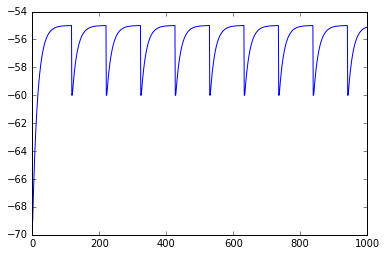

In [19]:
import nest
import pylab as pl #to plot figures
from sys import exit
# just for jupyter notebooks to put figures inside the document
% matplotlib inline 

nest.ResetKernel()


neuron = nest.Create('iaf_cond_alpha')



print 'I_e = ', nest.GetStatus(neuron, "I_e")
print 'V_reset and V_the are ', nest.GetStatus(neuron, ["V_reset", "V_th"])

# stimulate the neuron with a constant current
nest.SetStatus(neuron,{'I_e':250.10})
print 'I_e = ', nest.GetStatus(neuron, "I_e")

multimeter = nest.Create("multimeter")

nest.SetStatus(multimeter,{"withtime":True,
                           "record_from":["V_m"]})

spikedetector = nest.Create("spike_detector",
                            params={"withgid" : True,
                                    "withtime": True})

nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)

nest.Simulate(1000.0) # time in ms


dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]
pl.figure(1)
pl.plot(ts,Vms)

# print nest.GetStatus(spikedetector)[0].keys()
# print nest.GetStatus(spikedetector)[0]['events']
dSD = nest.GetStatus(spikedetector,keys='events')[0]
evs = dSD['senders']
ts = dSD["times"]
# pl.figure(2)
# pl.plot(ts,evs,'.')
# pl.show()